In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv('diabetes_dataset.csv')
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(type(Data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# To check for any missing values in the data set

print(Data.isna().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Z score normalization

Data_Normalized=((Data-Data.mean())/Data.std())
Data_Normalized.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1.365006
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,-0.731643
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1.365006
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,-0.731643
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1.365006


In [6]:
# Covariance Matrix 
cov_matrix=Data_Normalized.cov()
print(cov_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [7]:
import seaborn as sns

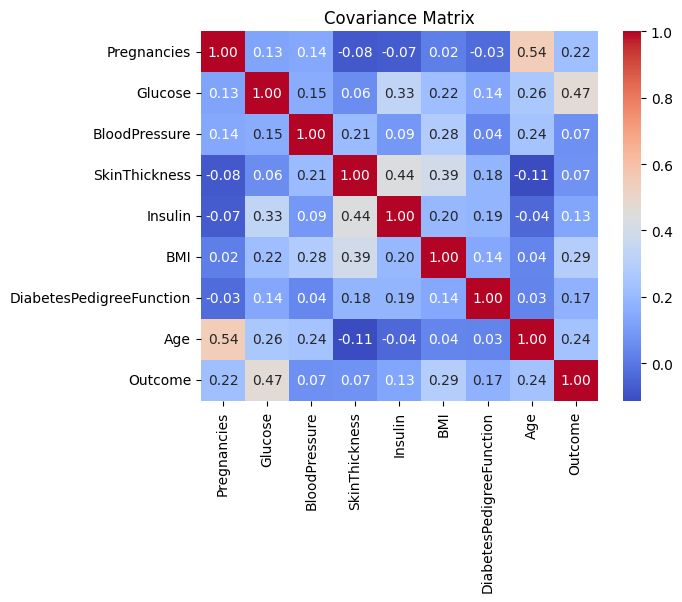

In [8]:
sns.heatmap(cov_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Covariance Matrix")
plt.show()

In [9]:
Data_Normalized.shape

(768, 9)

In [10]:
from sklearn.model_selection import train_test_split
Y=Data['Outcome']
X=Data_Normalized.drop(columns=['Outcome'],inplace=True,axis=1)


In [11]:
X=Data_Normalized

In [12]:
# Dividing data into Train and Test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [14]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

X_trains=X_train.values
Y_trains=Y_train.values
svm = SVM()
svm.fit(X_trains, Y_trains)

predictions = svm.predict(X_trains)
print("Predictions:", predictions)




Predictions: [ 1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1.
  1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1.
  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1.
  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.
 -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
  1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1.
 -1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1.
 -1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1. -1.
 -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1.  1.  1. -1. -1.  1. -1. -1. -

In [15]:
array = [0 if x == -1 else x for x in predictions]
print(array)

[1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 

In [16]:
accuracy = np.mean(array == Y_train)
print("Accuracy:", accuracy)

Accuracy: 0.7745398773006135


In [17]:
svm1 = SVM()
svm1.fit(X_trains, Y_trains)
X_tests=X_test.values
predictions = svm.predict(X_tests)
print("Predictions:", predictions)

Predictions: [-1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
  1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.
  1. -1.  1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1.
 -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1. -1.]


In [18]:
array1 = [0 if x == -1 else x for x in predictions]
print(array1)

[0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0]


In [19]:
accuracy_test = np.mean(array1== Y_test)
print("Accuracy:", accuracy_test)

Accuracy: 0.7586206896551724
